<font size=5>This research project is conducted and completed by SIN Chun Hung, a mathematician from The Hong Kong University of Science and Technology. 

## Problem Statement

Stay alert is one of the fundamental factors of safety driving.If a driver loses concentration and not stay alert,the probability of triggering traffic accident will be higher.In this project,decision tree classifier and random forest will be applied to the real world dataset from Kaggle(https://www.kaggle.com/datasets), **predicting whether the drivers are in alert or not.**

## Downloading the data

In [1]:
# install the opendatasets library
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/c/stayalert/data'

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in ".\stayalert" (use force=True to force download)


It is easy to check whether the file is downloaded by importing os.

In [5]:
import os

In [6]:
data_dir = './stayalert'

In [7]:
os.listdir(data_dir)

['example_submission.csv', 'fordTest.csv', 'fordTrain.csv', 'Solution.csv']

There are four excel documents downloaded,storing in file stayalert.'fordTest.csv' and 'fordTrain.csv' will be used for this project and others can be ignored.(As the prediction created will not submit to Kaggle,just for project purpose.)

## Convert the dataset into pandas dataframe

In [8]:
!pip install pandas --upgrade --quiet

In [9]:
import pandas as pd

In [10]:
original_data_set = pd.read_csv('./stayalert/fordTrain.csv')

In [11]:
original_data_set

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [12]:
original_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

The dataset 604329 examples and 33 columns.P1,.....,P8 represent physiological data.E1,....,E11 represent environmental data.V1,....,V11 represent vehicular data.All columns are in numerical datatype.Our objective is to predict the target column
IsAlert.

Then,using the well-trained model to predict the target column  IsAlert in the following test set.

In [13]:
testing_data_set = pd.read_csv('./stayalert/fordTest.csv')

In [14]:
testing_data_set

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,...,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


## Training set and Validation set

In [15]:
# As the test set is provided,then we can split our original dataset into training set and validation set with 75% and 25% 
# of data respectively.
# 510*0.75 = 382.5
train_set = original_data_set[original_data_set['TrialID'] <= 382]
valid_set = original_data_set[original_data_set['TrialID'] >= 383]

In [16]:
train_set

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462971,382,1206,0,35.6552,12.14500,844,71.0900,0.097299,588,102.041,...,-0.070,255,0.00000,1,792,0,0.0,0,1,10.9943
462972,382,1207,0,35.6152,11.66750,844,71.0900,0.097299,588,102.041,...,-0.070,255,0.00000,1,796,0,0.0,0,1,10.9945
462973,382,1208,0,35.5639,12.84220,808,74.2574,0.081731,588,102.041,...,-0.070,255,0.00000,1,792,0,0.0,0,1,10.9875
462974,382,1209,0,35.4743,16.16380,808,74.2574,0.081731,588,102.041,...,-0.070,255,0.00000,1,788,0,0.0,0,1,10.9877


In [17]:
valid_set

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
462976,383,0,0,35.4199,7.38627,808,74.2574,0.081731,576,104.1670,...,-0.070,255,0.00000,1,787,0,0.0,0,1,10.9854
462977,383,1,0,35.3158,11.24800,808,74.2574,0.081731,576,104.1670,...,-0.070,255,0.00000,1,792,0,0.0,0,1,10.9641
462978,383,2,0,35.2346,11.98300,808,74.2574,0.081731,576,104.1670,...,-0.070,255,0.00000,1,793,0,0.0,0,1,10.9859
462979,383,3,0,35.1370,11.41180,808,74.2574,0.081731,576,104.1670,...,-0.070,255,0.00000,1,797,0,0.0,0,1,10.9759
462980,383,4,0,35.0198,12.32660,808,74.2574,0.081731,576,104.1670,...,-0.070,255,0.00000,1,797,0,0.0,0,1,10.9710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


## Input and Target columns


In [18]:
# just pick out the physiological,environmental and vehicular features.
input_cols= list(original_data_set.columns)[3:]
input_cols

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11']

In [19]:
target_col = 'IsAlert'

## Using input_cols and target_col to simplify the training set and validation set

In [20]:
train_input = train_set[input_cols].copy()
val_input = valid_set[input_cols].copy()

In [21]:
train_target = train_set[target_col].copy()
val_target = valid_set[target_col].copy()

In [22]:
train_input

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.000,0.00,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.000,0.00,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.000,0.00,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.000,0.00,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.000,0.00,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462971,35.6552,12.14500,844,71.0900,0.097299,588,102.041,0,0.011,107.89,...,-0.070,255,0.00000,1,792,0,0.0,0,1,10.9943
462972,35.6152,11.66750,844,71.0900,0.097299,588,102.041,0,0.011,107.89,...,-0.070,255,0.00000,1,796,0,0.0,0,1,10.9945
462973,35.5639,12.84220,808,74.2574,0.081731,588,102.041,0,0.011,107.89,...,-0.070,255,0.00000,1,792,0,0.0,0,1,10.9875
462974,35.4743,16.16380,808,74.2574,0.081731,588,102.041,0,0.011,107.89,...,-0.070,255,0.00000,1,788,0,0.0,0,1,10.9877


## Check and impute the missing numerical data

In [23]:
train_input.isna().sum()

P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
E1     0
E2     0
E3     0
E4     0
E5     0
E6     0
E7     0
E8     0
E9     0
E10    0
E11    0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64

In [24]:
val_input.isna().sum()

P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
E1     0
E2     0
E3     0
E4     0
E5     0
E6     0
E7     0
E8     0
E9     0
E10    0
E11    0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64

It seems that the training set and validation set do not contain missing value nan.Therefore,it is not necessary to imputem missing data.

## Scaling numerical value

It is easy to see that the range of all the columns are far different.Therefore,normalization is needed in order to avoid a particular feature dominate a model and weaken the importance of other features.

In [25]:
original_data_set[input_cols].describe()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


Let us use MinMaxScaler from sklearn.preprocessing to scale all the values

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(original_data_set[input_cols])

MinMaxScaler()

In [29]:
train_input[input_cols] = scaler.transform(train_input[input_cols])
val_input[input_cols] = scaler.transform(val_input[input_cols])
testing_data_set[input_cols] = scaler.transform(testing_data_set[input_cols])

In [30]:
# map all the values to (0,1) range
train_input.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,462976.000000,462976.000000,462976.000000,462976.000000,462976.000000,462976.000000,462976.000000,462976.0,462976.000000,462976.000000,...,462976.000000,462976.000000,462976.000000,462976.000000,462976.000000,462976.0,462976.000000,462976.0,462976.000000,462976.000000
mean,0.467431,0.493023,0.260520,0.421668,0.005807,0.003284,0.161866,0.0,0.043961,0.294438,...,0.541060,0.420505,0.043184,0.179443,0.354499,0.0,0.156462,0.0,0.392604,0.035307
std,0.066172,0.031313,0.153913,0.207015,0.015563,0.012510,0.041645,0.0,0.057899,0.358595,...,0.045239,0.378669,0.137770,0.383724,0.124226,0.0,0.138914,0.0,0.202531,0.042746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.433740,0.476010,0.143426,0.265808,0.001910,0.002414,0.135109,0.0,0.000000,0.000000,...,0.525896,0.019157,0.003070,0.000000,0.297424,0.0,0.000000,0.0,0.500000,0.022367
50%,0.455347,0.488172,0.247012,0.379505,0.002436,0.003044,0.154867,0.0,0.000000,0.000000,...,0.545817,0.346105,0.006231,0.000000,0.409035,0.0,0.160780,0.0,0.500000,0.029997
75%,0.483739,0.507024,0.356574,0.545091,0.007833,0.003568,0.187781,0.0,0.116398,0.606614,...,0.553785,0.673052,0.015442,0.000000,0.439084,0.0,0.266748,0.0,0.500000,0.047558
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,0.993857,1.000000,1.000000,0.0,0.790499,0.0,1.000000,1.000000


## Encoding categorical data
As the dataset do not cotain categorical columns, so there is no need to use OneHotEncoder to do the transformation.

## Decision Tree Classifier 
To train the decision tree classifier ,we can use DecisionTreeClassifier from sklearn.tree .

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree = DecisionTreeClassifier(random_state=42)

In [33]:
tree.fit(train_input,train_target)

DecisionTreeClassifier(random_state=42)

In [34]:
tree_pred_train = tree.predict(train_input)

In [35]:
tree_pred_val = tree.predict(val_input)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(train_target,tree_pred_train)

1.0

In [38]:
accuracy_score(val_target,tree_pred_val)

0.5969523108812689

Although the decision tree classifier created can predict the training data set with accuracy 100% , it predicts the validation set only around 60% accuracy .It seems that we should tune some hyperparameters such that the model can predict the target column more precise. 

## Hyperparameter tuning
We will explore some hyperparameters and find the suitable value for model improvement.

#### max_depth

In [39]:
## Let's define a helper function for testing different value of max_depth.
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md , random_state=42)
    model.fit(train_input,train_target)
    train_acc = 1 - model.score(train_input,train_target)
    val_acc = 1 - model.score(val_input,val_target)
    return {'Max Depth':md , 'Train Error':train_acc , 'Validation Error':val_acc}

In [40]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [41]:
errors_df

,Max Depth,Train Error,Validation Error
0,1,0.304143,0.359823
1,2,0.199658,0.362122
2,3,0.155980,0.359483
3,4,0.153976,0.360643
4,5,0.133223,0.364647
5,6,0.121047,0.364060
6,7,0.104656,0.369479
7,8,0.096260,0.306870
8,9,0.083492,0.370625
9,10,0.074136,0.334361


From the dataframe created above,it is clear that the max_depth of the decision tree classifier should be set at 8 such that the model has the least validation error of around 30%.

### max_leaf_nodes

In [42]:
## Let's define a helper function for testing different value of max_leaf_nodes.
def max_leaf_nodes_error(md):
    model = DecisionTreeClassifier(max_leaf_nodes=md , random_state=42)
    model.fit(train_input,train_target)
    train_acc = 1 - model.score(train_input,train_target)
    val_acc = 1 - model.score(val_input,val_target)
    return {'Max Leaf Nodes':md , 'Train Error':train_acc , 'Validation Error':val_acc}

In [43]:
error_mln_df=pd.DataFrame([max_leaf_nodes_error(md) for md in range(10,151)[0:141:10]])

In [44]:
error_mln_df

,Max Leaf Nodes,Train Error,Validation Error
0,10,0.138418,0.362122
1,20,0.119674,0.281996
2,30,0.112952,0.317694
3,40,0.105075,0.317489
4,50,0.099318,0.292735
5,60,0.095374,0.292855
6,70,0.090970,0.310252
7,80,0.089266,0.311405
8,90,0.087812,0.312798
9,100,0.084745,0.351149


From the dataframe created above,it is clear that the max_leaf_nodes of the decision tree classifier should be set at 20 such that the model has the least validation error of around 28%.

### min_samples_split

In [45]:
## Let's define a helper function for testing different value of min_samples_split.
def min_samples_split_error(md):
    model = DecisionTreeClassifier(min_samples_split=md , random_state=42)
    model.fit(train_input,train_target)
    train_acc = 1 - model.score(train_input,train_target)
    val_acc = 1 - model.score(val_input,val_target)
    return {'Min Samples Split':md , 'Train Error':train_acc , 'Validation Error':val_acc}

In [46]:
error_mss_df=pd.DataFrame([min_samples_split_error(md) for md in range(2,21)[0:19:2]])

In [47]:
error_mss_df

,Min Samples Split,Train Error,Validation Error
0,2,0.000000,0.403048
1,4,0.000421,0.404717
2,6,0.001240,0.397699
3,8,0.002458,0.397905
4,10,0.003603,0.403854
5,12,0.005255,0.403882
6,14,0.006681,0.401576
7,16,0.008193,0.392868
8,18,0.009666,0.400543
9,20,0.011020,0.396093


From the dataframe created above, it notices that there is no big difference for choosing values.We choose the value 16.

## Decision Tree Classifier (Best Version)

In [48]:
model_best_tree = DecisionTreeClassifier(max_depth=8 , max_leaf_nodes=20 , min_samples_split=16 , random_state=42)

In [49]:
model_best_tree.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_split=16,
                       random_state=42)

In [50]:
model_best_tree.score(train_input,train_target)

0.8803264100082941

In [51]:
model_best_tree.score(val_input,val_target)

0.718003862670053

Compare to the original model,the performance has been improved from 59% to 71%.This shows the hyperparameters tuning works. 

## Random Forests
To train a random forest,we can use RandomForestClassifier from sklearn.ensemble .

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier(n_jobs=-1,random_state=42)

In [54]:
model.fit(train_input,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [55]:
random_forest_pred_train = model.predict(train_input)

In [56]:
random_forest_pred_val = model.predict(val_input)

In [57]:
accuracy_score(train_target , random_forest_pred_train)

1.0

In [58]:
accuracy_score(val_target , random_forest_pred_val)

0.6463463810460337

Although the random forest created can predict the training set with accuracy 100%,it predicts the validation set with the accuracy only 64%.Therefore, it seems that we should tune some hyperparameters to make improvement of our model.

## Hyperparameter Tuning
We will explore some hyperparameters and find the suitable values for model improvement.Now,it is convenient to define two helper function.

In [59]:
# first helper function
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_input, train_target)
    train_acc = 1 - model.score(train_input,train_target)
    val_acc = 1 - model.score(val_input,val_target)
    return train_acc , val_acc

In [60]:
# second helper function
def test_param_and_plot(param_name, param_values):
    train_accuracy, val_accuracy = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_acc, val_acc = test_params(**params)
        train_accuracy.append(train_acc)
        val_accuracy.append(val_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accuracy, 'b-o')
    plt.plot(param_values, val_accuracy, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('accuracy error (1-model_score)')
    plt.legend(['Training', 'Validation'])

In [61]:
!pip install numpy matplotlib seaborn plotly --upgrade --quiet

In [62]:
import matplotlib.pyplot as plt

In [63]:
import seaborn as sns
sns.set_style('darkgrid')

### n_estimators

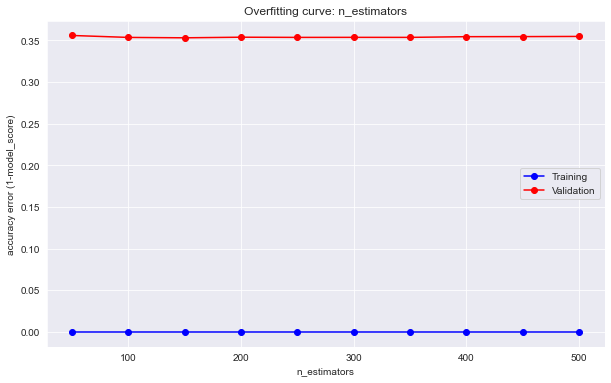

In [64]:
test_param_and_plot('n_estimators', range(50,501)[0::50])

It seems that the optimal value(least value) happen in [50,200].We should zoom in and do the investigation in this range.

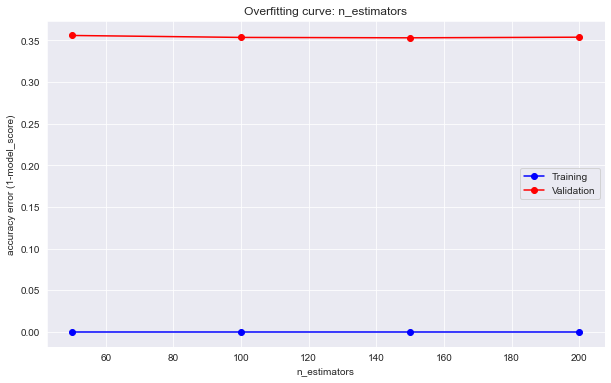

In [65]:
test_param_and_plot('n_estimators', range(50,201)[0::50])

In [66]:
test_params(n_estimators=150)

(0.0, 0.353186702793715)

In [67]:
test_params(n_estimators=200)

(0.0, 0.35391537498319814)

From the result above, it is reasonable to choose 150 as our optimal value.

## max_features

In [68]:
test_params(max_features='log2')

(0.0, 0.35695033002483145)

In [69]:
test_params(max_features='sqrt')

(0.0, 0.3536536189539663)

In [70]:
test_params(max_features=None)

(0.0, 0.36287875036256745)

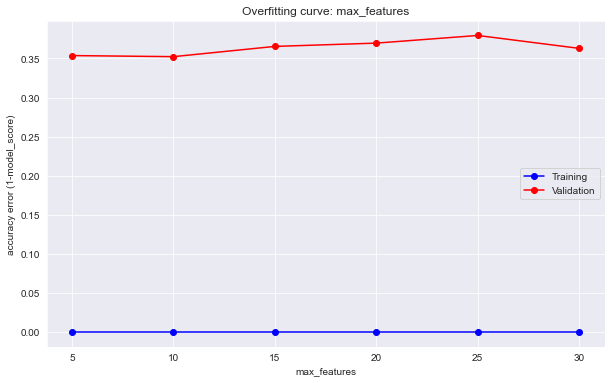

In [71]:
test_param_and_plot('max_features' , range(5,31)[0::5] )

From the graph,we should choose max_features=10.

In [72]:
test_params(max_features=10)

(0.0, 0.3522670194477655)

Combining all cases of max_features, we should choose 10 as our optimal value for the max_features hyperparameter such that the accuracy error will be the lowest.

## max_depth and max_leaf_nodes

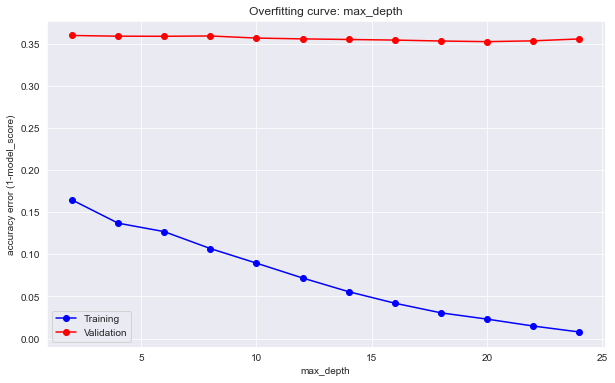

In [73]:
test_param_and_plot('max_depth' , range(2,25)[0:23:2])

From the above result,we should choose 20 as the optimal value for the max_depth hyperparameter.

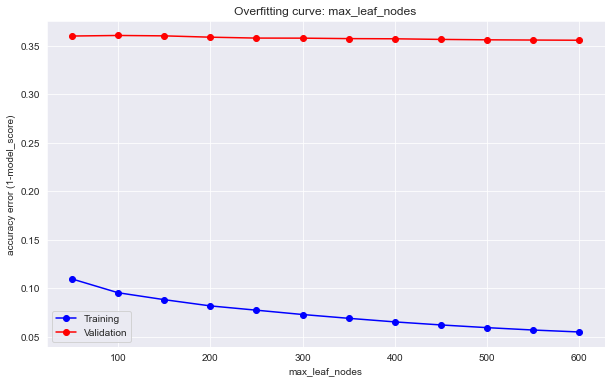

In [74]:
test_param_and_plot('max_leaf_nodes' , range(50,601)[0::50])

From the graph,it is wise to zoom in and pay attention to the range [400,600] since this range has relatively low accuracy error.

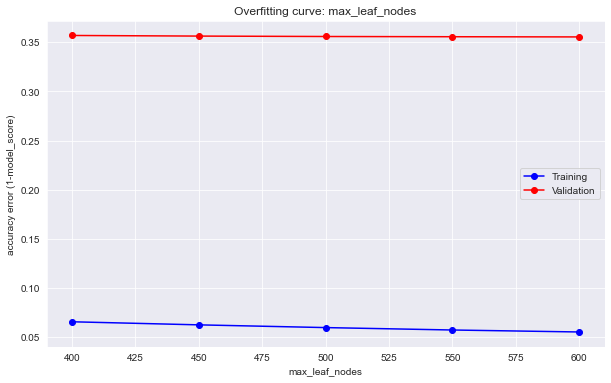

In [75]:
test_param_and_plot('max_leaf_nodes' , range(400,601)[0::50])

In [76]:
test_params(max_leaf_nodes=500)

(0.05936808819463646, 0.3559881997552228)

In [77]:
test_params(max_leaf_nodes=550)

(0.056910077412220095, 0.35575474167509713)

In [78]:
test_params(max_leaf_nodes=600)

(0.054899174039259035, 0.3555566560313541)

In the range [50,600] ,we should choose 600 as the optimal value of our max_leaf_nodes hyperparameters such that the error of accuracy is the lowest. 

## Bootstrap
We should set bootstrap =True such that the entire dataset will not be used for training each decision tree and make a better generalization of random forest model by bootstrapping.

## max_samples
When bootstrap=True , this parameter will help to pick the required number of samples from the dataset to train each base estimator.

In [79]:
test_params(max_samples=None)

(0.0, 0.3536536189539663)

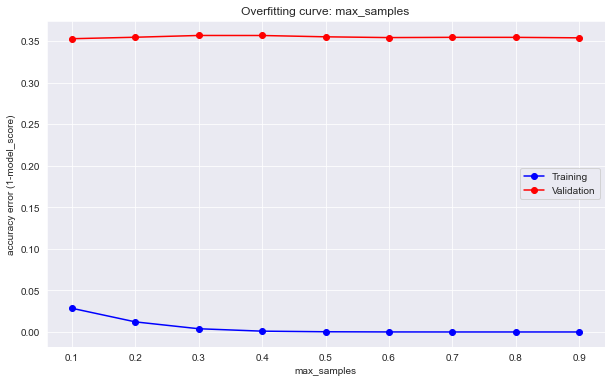

In [80]:
test_param_and_plot('max_samples' , [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [81]:
test_params(max_samples=0.1)

(0.028532796516450132, 0.35315133035733237)

In [82]:
test_params(max_samples=0.9)

(0.0, 0.3542266524233656)

From the above result, we should pick 0.1 as the optimal value for the hyperparameter max_samples as its validation accuracy error is the lowest among all the choices.

## min_samples_split 

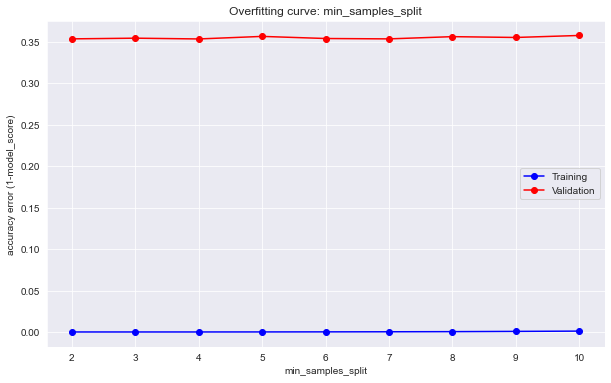

In [83]:
test_param_and_plot('min_samples_split' , range(2,11))

In [84]:
test_params(min_samples_split=4)

(1.2959635056652985e-05, 0.3535475016448183)

In [85]:
test_params(min_samples_split=6)

(0.00013175628974293474, 0.35408516267783496)

In [86]:
test_params(min_samples_split=7)

(0.00024407312690077898, 0.3536253210048602)

From the result above, we should choose 4 as optimal value for min_samples_split hyperparameter to reduce the accuracy error.

## Random Forest (Best Version)

In [87]:
model_random_forest = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=150,max_features=10
                                            ,max_depth=20,max_leaf_nodes=600,bootstrap=True,max_samples=0.1,
                                            min_samples_split=4,min_samples_leaf=2)

In [88]:
model_random_forest.fit(train_input,train_target)

RandomForestClassifier(max_depth=20, max_features=10, max_leaf_nodes=600,
                       max_samples=0.1, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [89]:
train_pred_best_randomforest = model_random_forest.predict(train_input)

In [90]:
val_pred_best_randomforest = model_random_forest.predict(val_input)

In [91]:
accuracy_score(train_target , train_pred_best_randomforest)

0.9510600981476361

In [92]:
accuracy_score(val_target , val_pred_best_randomforest)

0.6488436750546505

Although many hyperparameters are trained, the accuracy of random forest seems to improve slightly,from 0.646 to 0.648. 

## Prediction on the Test set 
At the previous line of code, the test set has already do the normalization and all the values of input columns do not contain nan value.

In [93]:
testing_data_set_pred1 = model_best_tree.predict(testing_data_set[input_cols])

In [94]:
testing_data_set_pred2 = model_random_forest.predict(testing_data_set[input_cols])

In [95]:
testing_data_set['IsAlert_DTC'] = testing_data_set_pred1

In [96]:
testing_data_set['IsAlert_RFC'] = testing_data_set_pred2

In [97]:
testing_data_set[['IsAlert','IsAlert_DTC','IsAlert_RFC']]

,IsAlert,IsAlert_DTC,IsAlert_RFC
0,?,1,1
1,?,1,1
2,?,1,1
3,?,1,1
4,?,1,1
...,...,...,...
120835,?,1,1
120836,?,1,1
120837,?,1,1
120838,?,1,1


# Summary

So far, what we have done in this project is:
1. Downloading the dataset from Kaggle
2. Converting the downloaded train set and test set from csv excel file into pandas dataframe in this notebook.
3. Spliting train set into training set and validation set with 75% and 25% data correspondingly.
4. Selecting input and target columns and using them to simplify the training set and validation set.
5. Checking miss numerical data. Scaling all the numerical columns . Checking whether to use OneHotEncoder or not.
6. Creating the DecisionTree, tuning the hyperparameter and finally creating the best decision tree to minimize the 
   error of predicting validation set.
7. Creating the Random Forest Classifier, tuning the hyperparameters and finally creating the best random forest classifier
   to minimize the prediction error in validation set.
8. Using the two models to predict the target column in test set,but not do the submission to Kaggle Competition.


### Comparsion between two models
The best model among the decision tree classifier and random forest classifier is the decision tree classifier because this model can predict the validation set with accuracy around 71-72% but the random forest model predicts with accuracy only 64-65%. 

In [5]:
project_name = "machine-learning-project-by-sinchunhung"

In [6]:
!pip install jovian --upgrade --quiet

In [7]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

In [100]:
jovian.submit(assignment="zerotogbms-project")

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/sinchunsimon/machine-learning-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
